In [12]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, assemble, transpile
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.ibmq import least_busy
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-05-11 18:44:52,252: Credentials are already in use. The existing account in the session will be replaced.


In [13]:


# Build
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

#Add a NOT gate on qubit 1
circuit.x(1)
# Add a H gate on qubit 0 and 1
circuit.h(0)
circuit.h(1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Add a H gate on qubit 0 and 1
circuit.h(0)
circuit.h(1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

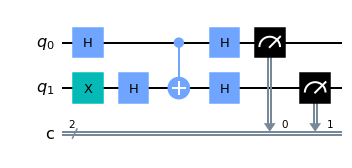

In [20]:
circuit.draw(output = 'mpl')

In [14]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)



Total count for 00 and 11 are: {'11': 1000}


CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fdd2ee2edf0>, editable=Fals…

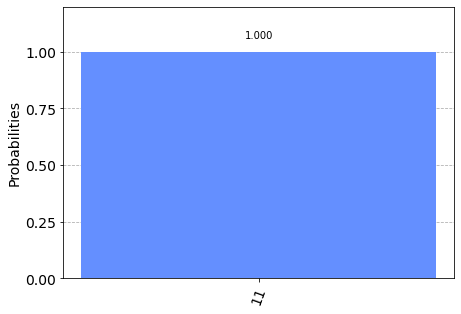

In [15]:
# Import draw_circuit, then use it to draw the circuit
from ibm_quantum_widgets import draw_circuit
draw_circuit(circuit)

# Analyze
#--------

# Plot a histogram
plot_histogram(counts)

In [16]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
n=2
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-05-11 18:45:14,642: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


In [17]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


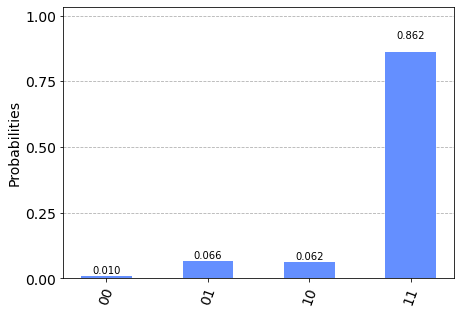

In [19]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)